# 7. 신경망, 딥러닝

딥러닝은 머신러닝의 한 방법이며, 신경망 모델이라고 불리는 뇌의 신경 네트워크에서 얻은 알고리즘입니다. 그 중에서도 특히 층을 많이 활용하는 모델이 '딥러닝'입니다.

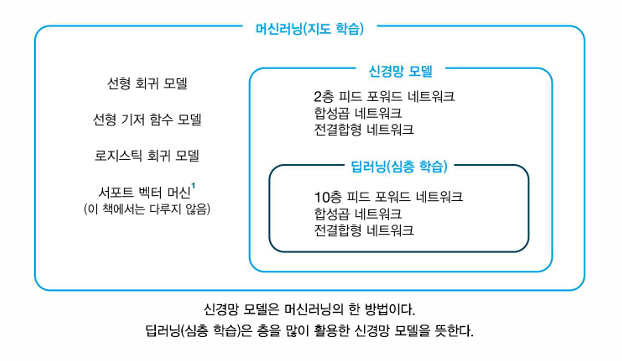

**딥러닝**은 Deep Neural Network라고 합니다. deep은 '**깊은 층으로 이루어진**'을 의미하고, neural network는 '**뇌의 신경 회로를 모방한 계산 모델**'을 말합니다.

## 7.1 뉴런 모델

신경망 모델은 '뉴런 모델'단위로 구축됩니다. 뉴런 모델은 뇌의 신경 세포인 뉴런에서 얻어진 수학적 모델입니다.

뉴런에 2개의 입력 x=(x0,x1)가 들어오는 것을 가정합니다. 각각의 입력에 대한 시냅스 전달 강도(가중치)를 w0,w1으로 하여, 이들을 곱하고 합한 후 마지막에 w2(bias)항을 더합니다. 이러한 입력 총합을 시그모이드 함수에 넣어 y값을 구합니다.

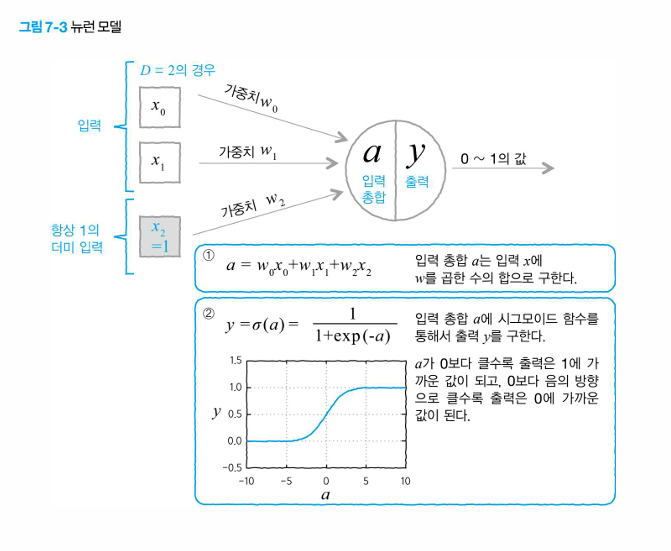

## 7.2 신경망 모델

### 7.2.1 2층 피드 포워드 신경망

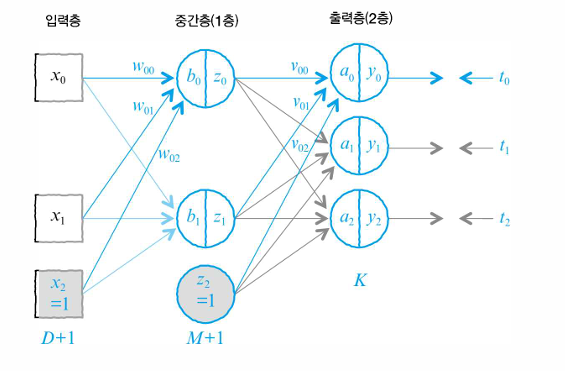

신호가 되돌아가는 경로가 없이, 한 방향으로만 흐르는 신경망을 '피드 포워드 신경망'이라고 합니다. 위의 사진은 2층 피드 포워드 신경망입니다.

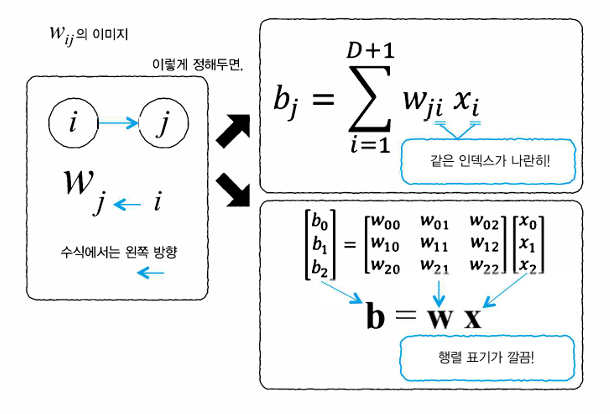

입력 총합 b_j를 활성화 함수에 적용하여 z_j를 구합니다. z_j와 v_j를 위와 같이 다시 계산하여 a_j를 구합니다. a_j를 softmax 함수에 넣어 y_j를 구합니다. 그림으로 보면 다음과 같습니다.

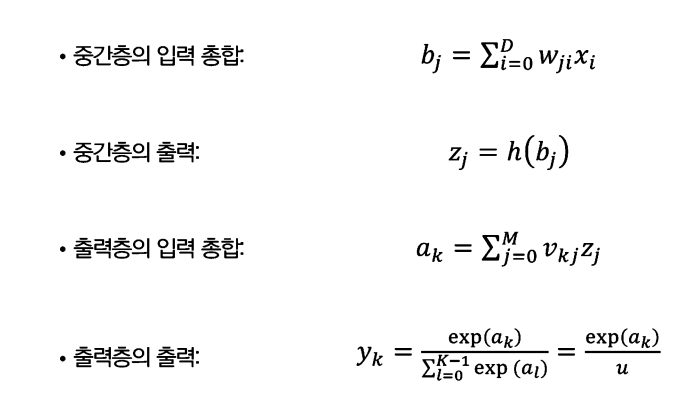

### 7.2.2 2층 피드 포워드 신경망의 구현

In [ ]:
# 리스트 7-1-(1)
import numpy as np

# 데이터 생성 ----
np.random.seed(seed = 1) # 난수를 고정
N = 200 # 데이터의 수
K = 3 # 분포의 수

T = np.zeros((N, 3), dtype = np.uint8)
X = np.zeros((N, 2))

X_range0 = [-3, 3] # X0의 범위 표시용
X_range1 = [-3, 3] # X1의 범위 표시용

Mu  = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산
Pi  = np.array([0.4, 0.8, 1]) # 각 분포에 대한 비율

for n in range(N) :
  wk = np.random.rand()
  for k in range(K) :
    if wk < Pi[k]:
      T[n, k] = 1
      break
  for k in range(2) :
    X[n, k] = np.random.randn() * Sig[T[n, :] == 1, k] + Mu[T[n, :] == 1, k]

<ipython-input-1-a891dc8de86c>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[n, k] = np.random.randn() * Sig[T[n, :] == 1, k] + Mu[T[n, :] == 1, k]


In [ ]:
# 리스트 7-1-(2)
# ---- 2 분류 데이터를 테스트 훈련 데이터로 분할
TestRatio = 0.5
X_n_training = int(N * TestRatio)

X_train = X[:X_n_training, :]
X_test  = X[X_n_training:, :]

T_train = T[:X_n_training, :]
T_test  = T[X_n_training:, :]

# ---- 데이터를 'class_data.npz'에 저장
np.savez('class_data.npz', X_train = X_train, T_train = T_train, X_test = X_test, T_test = T_test, X_range0 = X_range0, X_range1 = X_range1)

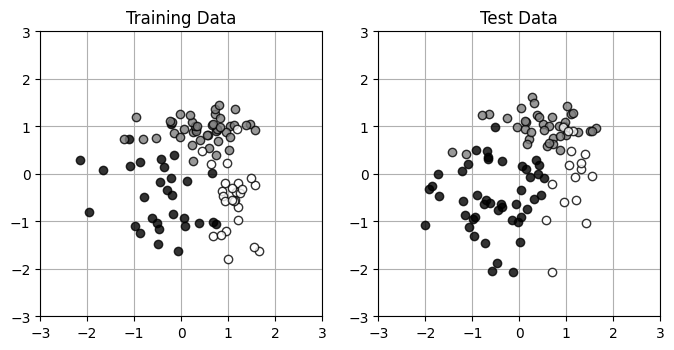

In [ ]:
# 리스트 7-1-(3)
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터를 그리기 ----
def Show_data(x, t) :
  wk, n = t.shape
  c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
  for i in range(n) :
    plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], linestyle = 'none', marker = 'o', markeredgecolor = 'black', color = c[i], alpha = 0.8)
  plt.grid(True)

# 메인 ----
plt.figure(1, figsize = (8, 3.7))
plt.subplot(1, 2, 1)
Show_data(X_train, T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')

plt.subplot(1, 2, 2)
Show_data(X_test, T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')
plt.show()

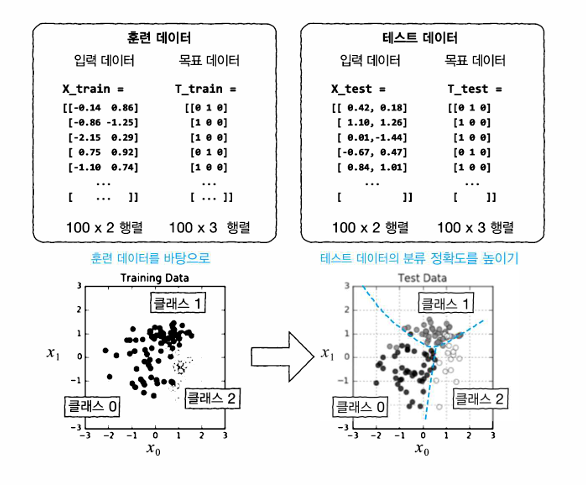

2층의 피드 포워드 신경망을 정의하는 함수를 FNN으로 합니다. FNN은 네트워크 입력 x를 받아 y를 출력합니다. 입력 x는 D차원 벡터이며, 출력 y는 K차원 벡터입니다. D=2, K=3으로 가정합니다.

초기 가중치 값 W와 V는 다음과 같이 설정합니다.

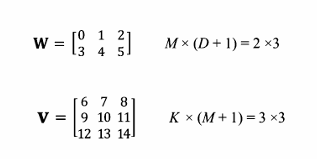

In [ ]:
# 리스트 7-1-(4)
# 시그모이드 함수 ----
def Sigmoid(x) :
  y = 1 / (1 + np.exp(-x))
  return y

# 네트워크 ----
def FNN(wv, M, K, x) :
  N, D = x.shape # 입력 차원

  w = wv[:M * (D + 1)] # 중간층 뉴런의 가중치
  w = w.reshape(M, (D + 1))

  v = wv[M * (D + 1):] # 출력층 뉴런의 가중치
  v = v.reshape((K, M + 1))

  b = np.zeros((N, M + 1)) # 중간층 뉴런의 입력 총합
  z = np.zeros((N, M + 1)) # 중간층 뉴런의 출력

  a = np.zeros((N, K)) # 출력층 뉴런의 입력 총합
  y = np.zeros((N, K)) # 출력층 뉴런의 출력

  for n in range(N) :
    # 중간층의 계산
    for m in range(M) :
      b[n, m] = np.dot(w[m, :], np.r_[x[n, :], 1]) # (A)
      z[n, m] = Sigmoid(b[n, m])

    # 출력층의 계산
    z[n, M] = 1 #더미 뉴런
    wkz = 0
    for k in range(K) :
      a[n, k] = np.dot(v[k, :], z[n, :])
      wkz = wkz + np.exp(a[n, k])
    for k in range(K) :
      y[n, k] = np.exp(a[n, k]) / wkz
  return y, a, z, b

# test ----
WV = np.ones(15)
M = 2
K = 3
FNN(WV, M, K, X_train[:2, :])

(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[2.6971835 , 2.6971835 , 2.6971835 ],
        [1.49172649, 1.49172649, 1.49172649]]),
 array([[0.84859175, 0.84859175, 1.        ],
        [0.24586324, 0.24586324, 1.        ]]),
 array([[ 1.72359839,  1.72359839,  0.        ],
        [-1.12079826, -1.12079826,  0.        ]]))

### 7.2.3 수치 미분법 (numerical gradient)

2층 피드 포워드 네트워크에서 3분류 문제 풀기를 가정합니다. 우선 분류 문제이므로 오차 함수는 평균 교차 엔트로피를 사용합니다. 함수 이름은 CE_FNN으로 합니다.

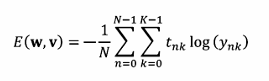

In [ ]:
# 리스트 7-1-(5)
# 평균 교차 엔트로피 오차 ----
def CE_FNN(wv, M, k, x, t) :
  N, D = x.shape
  y, a, z, b = FNN(wv, M, K, x)
  ce = -np.dot(np.log(y.reshape(-1)), t.reshape(-1)) / N
  return ce

# test ----
WV = np.ones(15)
M = 2
K = 3
CE_FNN(WV, M, K, X_train[:2, :], T_train[:2, :])

1.0986122886681098

gradient를 구하기 위해 편미분 값을 사용할 수 있지만 여기선 근사적인 기울기를 계산합니다. epsilon 값을 0.001로 정의하여, 기울기를 확인합니다.

[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


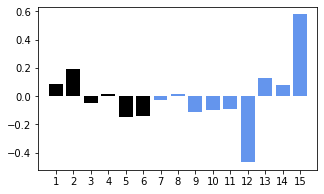

In [ ]:
# 리스트 7-1-(6)
# 수치 미분 ----
def dCE_FNN_num(wv, M, K, x, t) :
  epsilon = 0.001
  dwv = np.zeros_like(wv)
  for iwv in range(len(wv)) :
    wv_modified = wv.copy()

    wv_modified[iwv] = wv[iwv] - epsilon
    mse1 = CE_FNN(wv_modified, M, K, x, t)

    wv_modified[iwv] = wv[iwv] + epsilon
    mse2 = CE_FNN(wv_modified, M, K, x, t)

    dwv[iwv] = (mse2 - mse1) / (2 * epsilon)
  return dwv

# dVW 표시 ----
def Show_WV(wv, M) :
  N = wv.shape[0]
  plt.bar(range(1, M * 3 + 1), wv[:M * 3], align = "center", color = 'black')
  plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:], align = "center", color = 'cornflowerblue')
  plt.xticks(range(1, N + 1))
  plt.xlim(0, N + 1)

# test ----
M = 2
K = 3
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)
dWV = dCE_FNN_num(WV, M, K, X_train[:2, :], T_train[:2, :])
print(dWV)

plt.figure(1, figsize = (5, 3))
Show_WV(dWV, M)
plt.show()

초기 가중치 값에 대한 편미분 값은 다음과 같습니다.

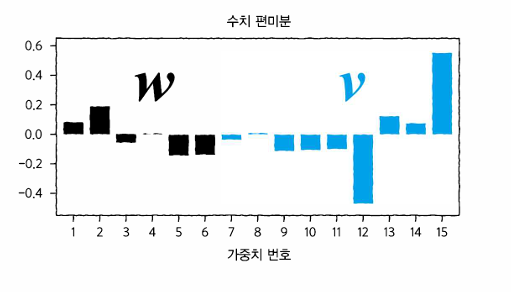

### 7.2.4 수치 미분법에 의한 경사 하강법

이제 앞에서 구한 gradient를 통해 경사 하강법을 진행합니다. 함수명은 Fit_FNN_num으로 합니다.

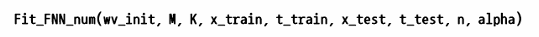

지금까지와는 다른 부분은 입력에 학습시키는 가중치의 초기값으로 wv_init을 넣는 것입니다. 또 훈련 데이터뿐만 아니라 테스트 데이터도 입력합니다. 이것은 학습 단계별로 테스트 데이터의 오차도 체크해 오버 피팅이 일어나고 잇지 않은지 확인하기 위해서입니다. 물론 테스트 데이터의 정보는 매개 변수의 학습에는 사용하지 않습니다. n은 학습 단계수로, alpha는 학습 상수입니다. 출력은 최적화된 매개 변수 wvt입니다.

In [ ]:
# 리스트 7-1-(7)
import time

# 수치 미분을 사용한 구배법 ----
def Fit_FNN_num(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha) :
  wvt = wv_init
  err_train = np.zeros(n)
  err_test  = np.zeros(n)
  wv_hist = np.zeros((n, len(wv_init)))
  epsilon = 0.001

  for i in range(n) : # (A)
    wvt = wvt - alpha * dCE_FNN_num(wvt, M, K, x_train, t_train)

    err_train[i] = CE_FNN(wvt, M, K, x_train, t_train)
    err_test[i]  = CE_FNN(wvt, M, K, x_test, t_test)
    wv_hist[i, :] = wvt
  return wvt, wv_hist, err_train, err_test

# 메인 ----
startTime = time.time()

M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000 # (B) 학습단계
alpha = 0.5

WV, WV_hist, Err_train, Err_test = Fit_FNN_num(WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)

calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

Calculation time:185.183 sec


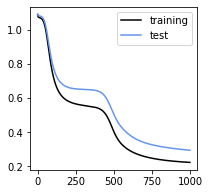

In [ ]:
# 리스트 7-1-(8)
# 학습 오차의 표시 ----
plt.figure(1, figsize = (3, 3))
plt.plot(Err_train, 'black', label = 'training')
plt.plot(Err_test,  'cornflowerblue', label = 'test')
plt.legend()
plt.show()

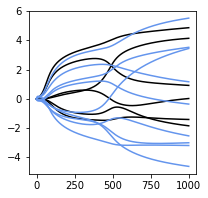

In [ ]:
# 리스트 7-1-(9)
# 가중치의 시간 변화의 표시 ----
plt.figure(1, figsize = (3, 3))
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')
plt.show()

시간에 따른 오차와 가중치의 변화를 확인할 수 있습니다. 중간층의 가중치 w를 검정으로, 출력층의 가중치 v를 파란색으로 표시합니다.

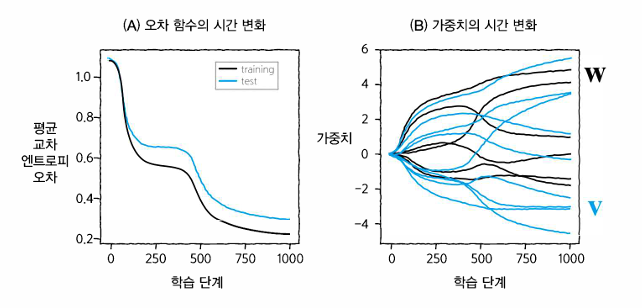

0 주변의 기본값으로 시작된 가중치는 각각 특정 값으로 수렴하고 있습니다. 그러나 400단계 부근에서 각각의 가중치 그래프가 교차하고 있음을 알 수 있습니다. 이것은 가중치를 갱신하는 방향, 즉 오차 함수의 기울기의 방향이 변화하는 것을 의미합니다. 가중치가 saddle point 지점 근처를 통과했기 때문일지 모릅니다.

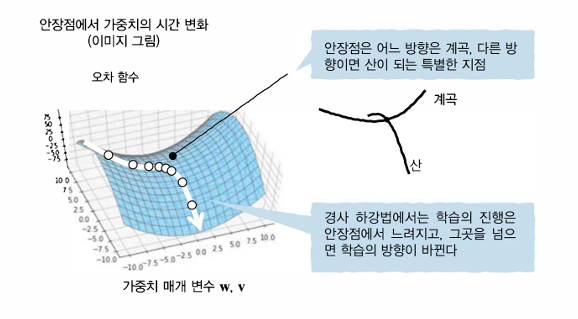

saddle point는 어느 방향은 gradient가 증가, 다른 방향으로는 gradient가 감소하는 지점입니다. 가중치 공간이 15차원이므로 오차 함수를 그릴 수는 없지만, 만약 2차원이라면 안장점의 이미지를 위와 같이 그릴 수 있습니다. 중심에 가까워질수록 갱신이 느려지지만, 어느 정도 진행되면 점차 방향이 변화하고, 갱신이 가속됩니다.

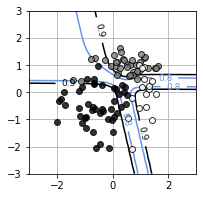

In [ ]:
# 리스트 7-1-(10)
# 경계선 표시 함수 ----
def show_FNN(wv, M, K) :
  xn = 60 # 등고선 표시 해상도
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0, x1)

  x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')] # 1 -> 'F'
  y, a, z, b = FNN(wv, M, K, x)

  plt.figure(1, figsize = (4, 4))
  for ic in range(K) :
    f = y[:, ic]
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, levels = [0.8, 0.9], colors = ['cornflowerblue', 'black'])
    cont.clabel(fmt = '%1.1f', fontsize = 9)
  plt.xlim(X_range0)
  plt.ylim(X_range1)

# 경계선 표시 ----
plt.figure(1, figsize = (3, 3))
Show_data(X_test, T_test)
show_FNN(WV, M, K)
plt.show()

위는 데이터 공간을 클래스 0, 1, 2로 판정하는 경계선을 표시한 그림입니다.

### 7.2.5 Backpropagation (analytic gradient)

피드 포워드 신경망에 학습시키는 방법으로 Backpropagation이 사용됩니다. 이 Backpropagation은 네트워크의 출력에서 발생하는 오차의 정보를 사용하여, 출력 가중치 v_kj에서 중간층에 가중치 w_jk로 입력 방향의 반대로 가중치를 갱신해 나가기 때문에 이러한 이름이 붙었습니다.

Backpropagation은 경사 하강법입니다. 경사 하강법을 피드 포워드 네트워크에 적용하면 Backpropagation이 도출됩니다.

경사 하강법을 적용하기 위해 크로스 엔트로피 오차 함수를 매개 변수로 편미분 합시다.

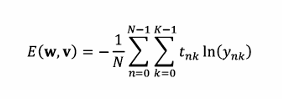

### 7.2.6 ∂E_n/∂v_kj 구하기

Chain rule을 이용해 다음과 같이 구할 수 있습니다.

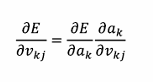

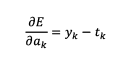
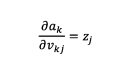
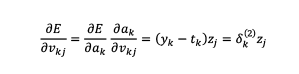

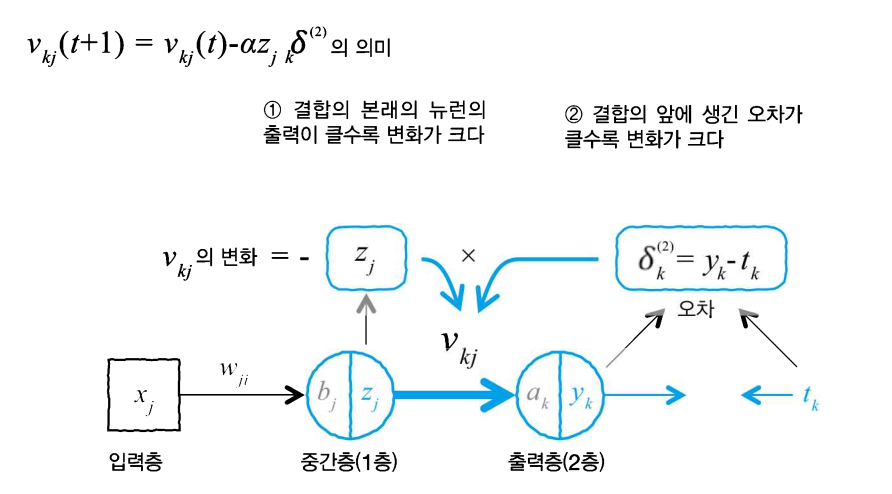

### 7.2.7 ∂E_n/∂w_kj 구하기

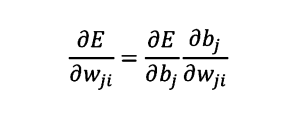

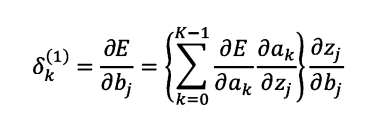
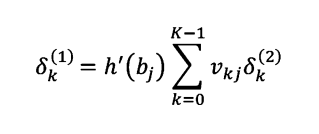

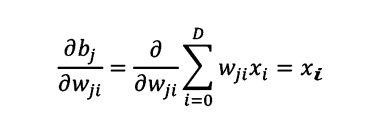

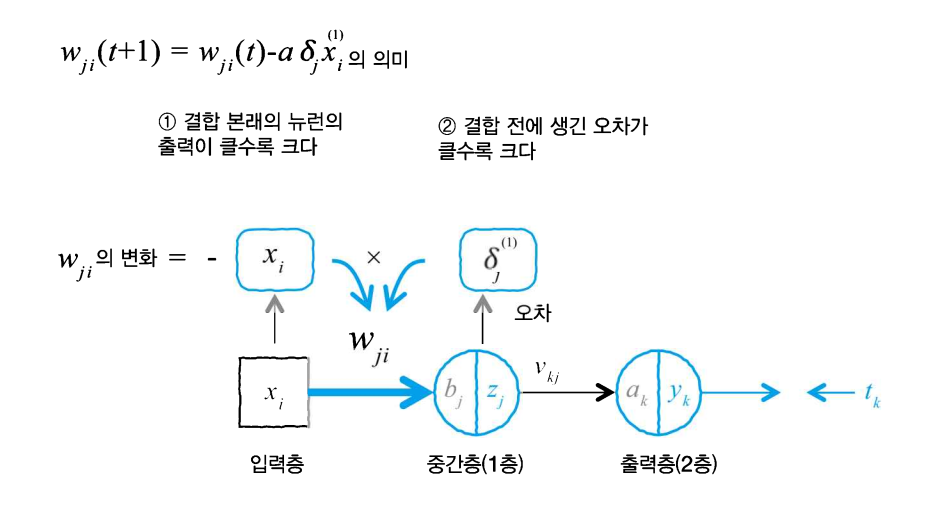

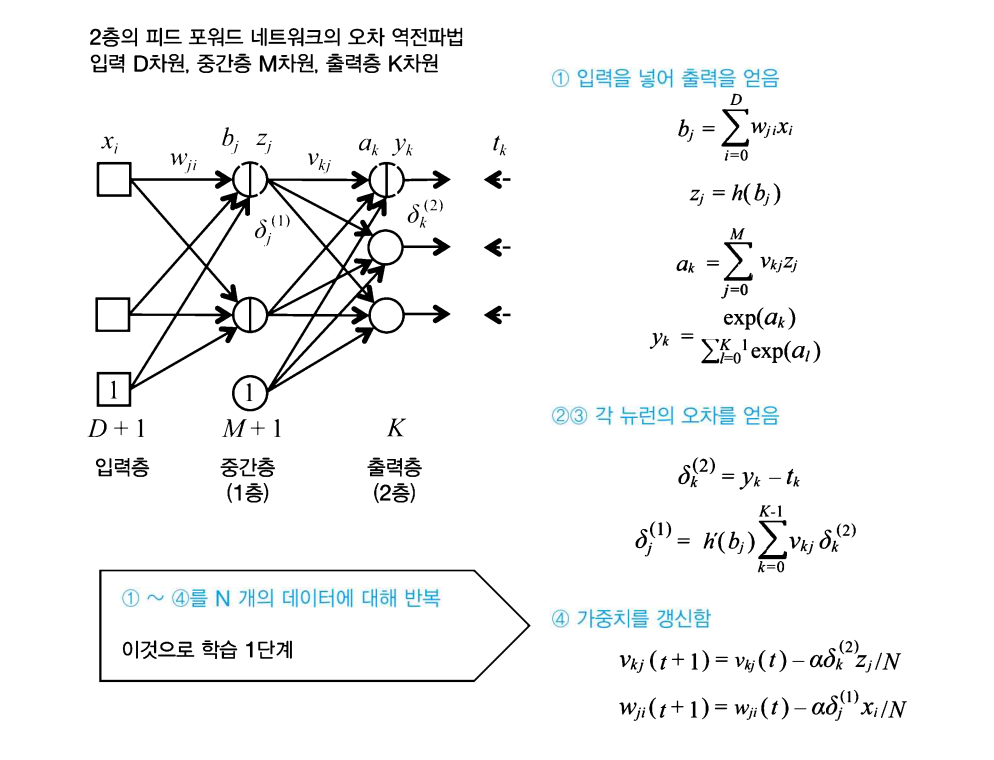

### 7.2.8 오차 역전파법의 구현

Backpropagation을 통해 w에 대한 편미분, v에 대한 편미분 값을 구하는 프로그램을 만듭니다. 함수의 이름은 dCE_FNN으로 합니다. 입력하는 정보는 CE_FNN과 동일합니다. w에 대한 편미분이 dw, v에 대한 편미분이 dv이며, 출력은 이 둘을 결합한 dwv로 합니다.

analytical dWV
[ 0.08848131  0.19158    -0.051398    0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115649 -0.10104422 -0.09427964 -0.46855604
  0.13096434  0.08076649  0.57971253]
numerical dWV
[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


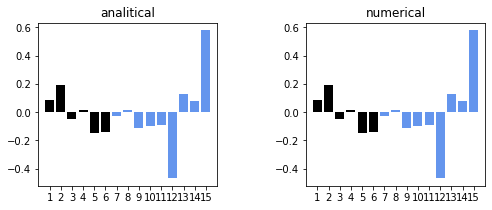

In [ ]:
# 리스트 7-1-(11)
# 해석적 미분 ----
def dCE_FNN(wv, M, K, x, t) :
  N, D = x.shape

  # wv을 w와 v로 되돌림
  w = wv[:M * (D + 1)]
  w = w.reshape(M, (D + 1))

  v = wv[M * (D + 1):]
  v = v.reshape((K, M + 1))

  # (1) x를 입력하여 y를 얻음
  y, a, z, b = FNN(wv, M, K, x)

  # 출력 변수의 준비
  dwv = np.zeros_like(wv)
  dw  = np.zeros((M, D + 1))
  dv  = np.zeros((K, M + 1))

  delta1 = np.zeros(M) # 1층 오차
  delta2 = np.zeros(K) # 2층 오차(k = 0 부분은 사용하지 않음)

  for n in range(N): # (A)
    # (2) 출력층의 오차 구하기
    for k in range(K) :
      delta2[k] = (y[n, k] - t[n, k])
    # (3) 중간층의 오차를 구하기
    for j in range(M) :
      delta1[j] = z[n, j] * (1 - z[n, j]) * np.dot(v[:, j], delta2)
    # (4) v의 기울기 dv를 구하기
    for k in range(K) :
      dv[k, :] = dv[k, :] + delta2[k] * z[n, :] / N
    # (4) w의 기울기 dw를 구하기
    for j in range(M) :
      dw[j, :] = dw[j, :] + delta1[j] * np.r_[x[n, :], 1] / N
  # dw와 dv를 합체시킨 dwv로 만들기
  dwv = np.c_[dw.reshape((1, M * (D + 1))), dv.reshape((1, K * (M + 1)))]
  dwv = dwv.reshape(-1)
  return dwv

# ----Show VW
def Show_dWV(wv, M):
  N = wv.shape[0]
  plt.bar(range(1, M * 3 + 1), wv[:M * 3], align = "center", color = 'black')

  plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:], align = "center", color = 'cornflowerblue')

  plt.xticks(range(1, N + 1))
  plt.xlim(0, N + 1)

# 동작 확인
M = 2
K = 3
N = 2
nWv = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)

dWV_ana = dCE_FNN(WV, M, K, X_train[:N, :], T_train[:N, :])
print("analytical dWV")
print(dWV_ana)

dWV_num = dCE_FNN_num(WV, M, K, X_train[:N, :], T_train[:N, :])
print("numerical dWV")
print(dWV_num)

plt.figure(1, figsize = (8, 3))
plt.subplots_adjust(wspace = 0.5)
plt.subplot(1, 2, 1)
Show_dWV(dWV_ana, M)
plt.title('analitical')

plt.subplot(1, 2, 2)
Show_dWV(dWV_num, M)
plt.title('numerical')
plt.show()

동작 확인을 위해 임의로 생성한 가중치 매개 변수 WV에 대한 미분값 dWV_ana를 출력합니다. 이전에 작성한 수치 미분값 dWV_num도 표시합니다. 검은색이 W, 파란색이 V 가중치를 나타냅니다.

numerical gradient로 gradient descent를 실행했었습니다. 이번엔 backpropagation(analytic gradient)로 gradient descent를 실행합니다.

In [ ]:
# 리스트 7-1-(12)
import time

# 해석적 미분을 사용한 구배법 ----
def Fit_FNN(wv_init, M, k, x_train, t_train, x_test, t_test, n, alpha) :
  wv = wv_init.copy()
  err_train = np.zeros(n)
  err_test  = np.zeros(n)

  wv_hist = np.zeros((n, len(wv_init)))
  epsilon = 0.001
  for i in range(n) :
    wv = wv - alpha * dCE_FNN(wv, M, K, x_train, t_train) # (A)
    err_train[i] = CE_FNN(wv, M, K, x_train, t_train)
    err_test[i]  = CE_FNN(wv, M, K, x_test, t_test)
    wv_hist[i, :] = wv
  return wv, wv_hist, err_train, err_test

# 메인 ----
startTime = time.time()

M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000
alpha = 1

WV, WV_hist, Err_train, Err_test = Fit_FNN(WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)

calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

Calculation time:23.102 sec


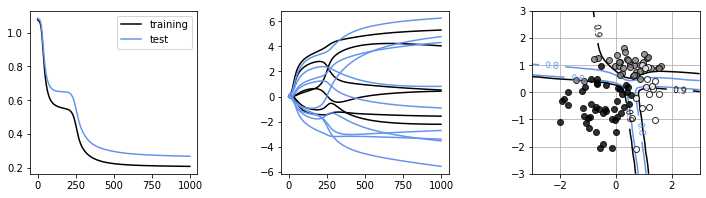

In [ ]:
# 리스트 7-1-(13)
plt.figure(1, figsize = (12, 3))
plt.subplots_adjust(wspace = 0.5)

# 학습 오차의 표시 ----
plt.subplot(1, 3, 1)
plt.plot(Err_train, 'black', label = 'training')
plt.plot(Err_test,  'cornflowerblue', label = 'test')
plt.legend()

# 가중치의 시간 변화 표시 ----
plt.subplot(1, 3, 2)
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')

# 경계선 표시 ----
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)

M = 2
K = 3
show_FNN(WV, M, K)
plt.show()

이 신경망은 최소 사이즈이지만, 네트워크의 규모가 커질수록 미분 계산 속도의 중요성은 더 커집니다. 그렇다면 수치 미분은 어디에 사용될까요? 도출된 미분 방정식이 맞는지 확인하는 강력한 도구가 됩니다. 이를 gradient check라고 합니다.

지금까지 만든 프로그램을 정리하면 다음과 같습니다.

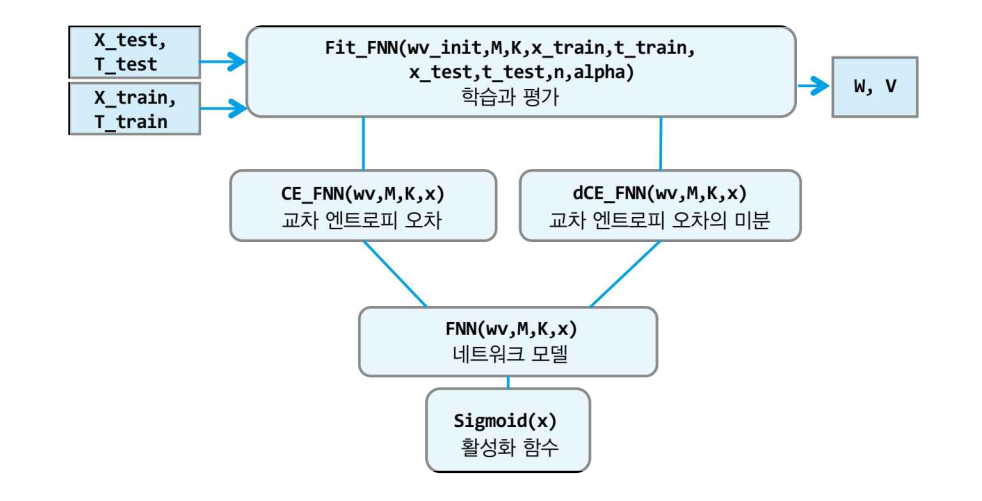

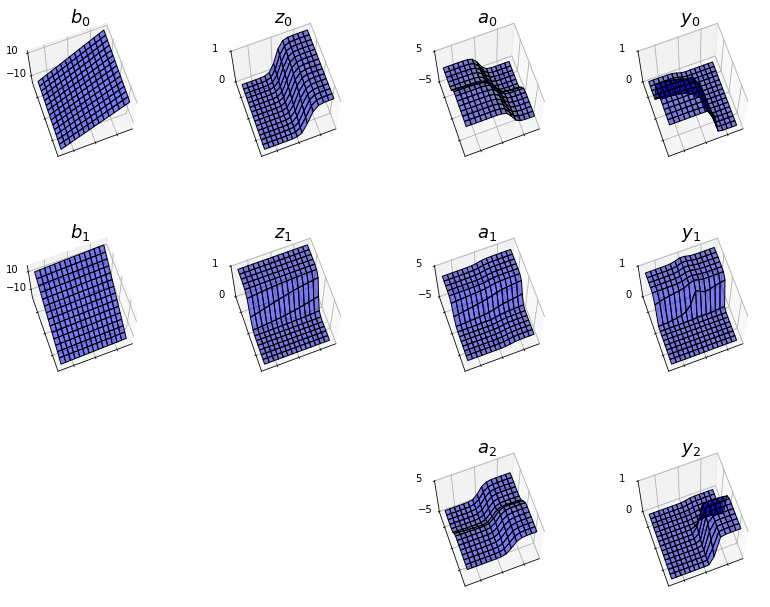

In [ ]:
# 리스트 7-1-(14)
from mpl_toolkits.mplot3d import Axes3D

def show_activation3d(ax, v, v_ticks, title_str) :
  f = v.copy()
  f = f.reshape(xn, xn)
  f = f.T

  ax.plot_surface(xx0, xx1, f, color = 'blue', edgecolor = 'black', rstride = 1, cstride = 1, alpha = 0.5)
  ax.view_init(70, -110)

  ax.set_xticklabels([])
  ax.set_yticklabels([])
  ax.set_zticks(v_ticks)
  ax.set_title(title_str, fontsize = 18)

M = 2
K = 3
xn = 15 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)

x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')] # 1 -> 'F'
y, a, z, b = FNN(WV, M, K, x)

fig = plt.figure(1, figsize = (12, 9))
plt.subplots_adjust(left = 0.075, bottom = 0.05, right = 0.95, top = 0.95, wspace = 0.4, hspace = 0.4)

for m in range(M) :
  ax = fig.add_subplot(3, 4, 1 + m * 4, projection = '3d')
  show_activation3d(ax, b[:, m], [-10, 10], '$b_{0:d}$'.format(m))

  ax = fig.add_subplot(3, 4, 2 + m * 4, projection = '3d')
  show_activation3d(ax, z[:, m], [0, 1], '$z_{0:d}$'.format(m))


for k in range(K) :
  ax = fig.add_subplot(3, 4, 3 + k * 4, projection = '3d')
  show_activation3d(ax, a[:, k], [-5, 5], '$a_{0:d}$'.format(k))

  ax = fig.add_subplot(3, 4, 4 + k * 4, projection = '3d')
  show_activation3d(ax, y[:, k], [0, 1], '$y_{0:d}$'.format(k))

plt.show()

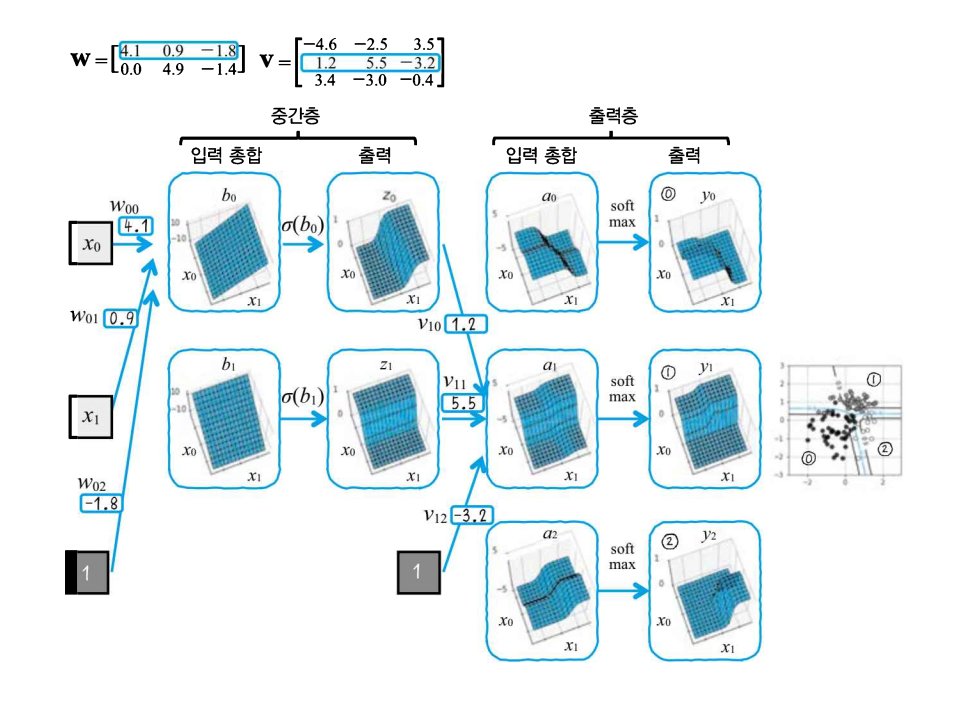

## 7.3 케라스로 신경망 모델 구현

케라스에서 3클래스 분류 문제를 푸는 2층 피드 포워드 네트워크를 만들어봅니다.

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### 7.3.1 2층 피드 포워드 신경망

In [ ]:
# 리스트 7-2-(1)
import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(1) # (A), 케라스 내부 사용되는 난수 초기화
import keras.optimizers #(B)
from keras.models import Sequential # (C)
from keras.layers.core import Dense, Activation #(D)

# 데이터 로드 ----
outfile = np.load('class_data.npz')
X_train = outfile['X_train']
T_train = outfile['T_train']

X_test = outfile['X_test']
T_test = outfile['T_test']

X_range0 = outfile['X_range0']
X_range1 = outfile['X_range1']

In [ ]:
# 리스트 7-2-(2)
# 데이터를 그리기 ----
def Show_data(x, t) :
  wk, n = t.shape
  c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
  for i in range(n) :
    plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], linestyle = 'none', marker = 'o', markeredgecolor = 'black', color = c[i], alpha = 0.8)
  plt.grid(True)

In [ ]:
# 리스트 7-2-(3)
# 난수 초기화
np.random.seed(1)

# ---- Sequential 모델 자석
model = Sequential()

# input: 2차원, 활성화 함수: 시그모이드, 가중치 매개 변수의 초기값: 균일한 난수 설정
model.add(Dense(2, input_dim = 2, activation = 'sigmoid', kernel_initializer = 'uniform')) # (A)
# 활성화 함수: 소프트맥스, 가중치 매개 변수의 초기값: 균일한 난수 설정
model.add(Dense(3, activation = 'softmax', kernel_initializer = 'uniform')) # (B)
sgd = keras.optimizers.SGD(lr = 1, momentum = 0.0, decay = 0.0, nesterov = False) # (C)

model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy']) # (D)

# ---- 학습
startTime = time.time()
history = model.fit(X_train, T_train, epochs = 1000, batch_size = 100, verbose = 0, validation_data = (X_test, T_test)) # (E)

# ---- 모델평가
score = model.evaluate(X_test, T_test, verbose = 0) # (F)
print('cross entropy {0:3.2f}, accuracy {1:3.2f}'.format(score[0], score[1]))

calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

cross entropy 0.26, accuracy 0.90
Calculation time:15.381 sec


### 7.3.2 케라스 상용의 흐름

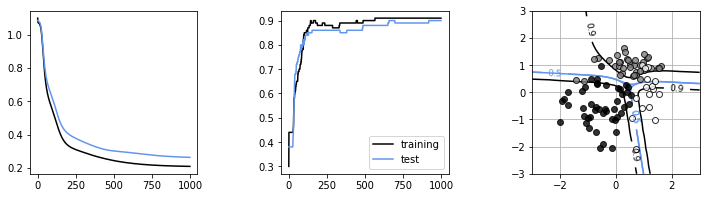

In [ ]:
# 리스트 7-2-(4)
plt.figure(1, figsize = (12, 3))
plt.subplots_adjust(wspace = 0.5)

# 학습 곡선 표시 ----
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], 'black', label = 'training') # (A)
plt.plot(history.history['val_loss'], 'cornflowerblue', label = 'test') # (B)

# 정확도 표시 ----
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], 'black', label = 'training') # (C) 'acc' -> 'accuracy'
plt.plot(history.history['val_accuracy'], 'cornflowerblue', label = 'test') # (D) 'val_acc' -> 'val_accuracy'
plt.legend()

# 경계선 표시 ----
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
xn = 60 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)

x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')] # 1 -> 'F'
y = model.predict(x) #(E)

K = 3
for ic in range(K) :
  f = y[:, ic]
  f = f.reshape(xn, xn)
  f = f.T

  cont = plt.contour(xx0, xx1, f, levels = [0.5, 0.9], colors = ['cornflowerblue', 'black'])
  cont.clabel(fmt = '%1.1f', fontsize = 9)
  plt.xlim(X_range0)
  plt.ylim(X_range1)

plt.show()

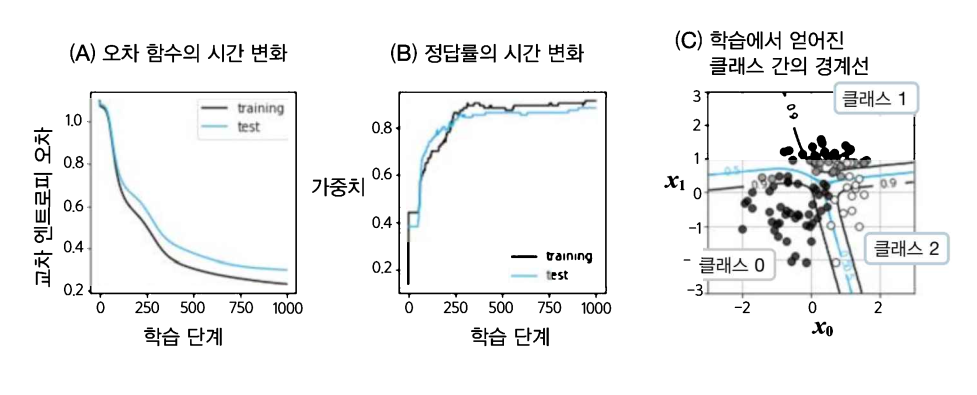